<a href="https://colab.research.google.com/github/patchu-madathil/FastAI/blob/master/camvidimagesegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Camvid Image Segmentation


In [0]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

path = untar_data(URLs.CAMVID)
path.ls()




In [12]:
path.ls()

path.ls()





[PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/images'),
 PosixPath('/root/.fastai/data/camvid/codes.txt'),
 PosixPath('/root/.fastai/data/camvid/valid.txt')]

In [27]:
label_path = path/'labels'
image_path = path/'images'


image_files = get_image_files(image_path)
label_files = get_image_files(label_path)

image_files[:4]





[PosixPath('/root/.fastai/data/camvid/images/0001TP_007080.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f03900.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_07959.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_07987.png')]

In [28]:
label_files[:4]

[PosixPath('/root/.fastai/data/camvid/labels/Seq05VD_f03780_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/Seq05VD_f01170_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_02340_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0001TP_007920_P.png')]

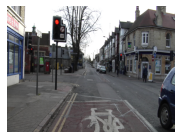

In [25]:
image_name = image_files[4]
open_image(image_name).show()


In [0]:
get_mask_fn = lambda x:label_path/f'{x.stem}_P{x.suffix}'

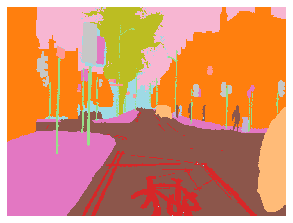

In [42]:
open_mask(get_mask_fn(image_name)).show(figsize=(5,5), alpha=1)




In [0]:
src_size = np.array(mask.shape[1:])

In [55]:
src_size

array([720, 960])

In [58]:
mask.data

tensor([[[ 4,  4,  4,  ..., 21, 21, 21],
         [ 4,  4,  4,  ..., 21, 21, 21],
         [ 4,  4,  4,  ..., 21, 21, 21],
         ...,
         [19, 19, 19,  ..., 17, 17, 17],
         [19, 19, 19,  ..., 17, 17, 17],
         [19, 19, 19,  ..., 17, 17, 17]]])

In [0]:
codes = np.loadtxt(path/'codes.txt', dtype=str)

In [61]:
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

Create and load batch

In [0]:
if(gpu_mem_get_free_no_cache() > 8200 ): bs = 8
else:                                   bs = 4
size = src_size/2

In [0]:
src = SegmentationItemList.from_folder(image_path).split_by_fname_file("../valid.txt").label_from_func(get_mask_fn, classes=codes)

In [79]:
data = (src.transform(get_transforms(), size=size, tfm_y = True))

Exception: ignored

In [0]:
fbeta??